In [6]:
import mediapipe as mp
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import os

In [7]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [8]:
coords = ["x", "y", "z"]
keypoint_names = []
keypoint_names.append("frame")
keypoint_names.append("class")

count = 0
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        keypoint_names.append("R"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1

count = 0
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        keypoint_names.append("L"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1

count = 0
for landmark in mp_holistic.PoseLandmark:
    for coord in coords:
        keypoint_names.append(str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
    if count == 15:
        break

In [9]:
df = pd.DataFrame([], columns= keypoint_names)
df

,frame,class,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z


In [10]:
# leer videos
#path = "Train_Dataset/"
path  ='gestures/'
words = [words for words in os.listdir(path) if os.path.isdir(os.path.join(path, words))]
print(words)
# Todos los videos se cambian a  resolucion (600x900), para su mejor deteccion de puntos.
HEIGHT = 600
WIDTH  = 900
for word in words:
    for video in os.listdir(os.path.join(path, word)):
        # Direccion donde se encuentran los videos
        frame_number = 0
        video_path = os.path.join(os.path.join(path, word), video)
        print(video_path)
        # Captura de videos
        cap = cv2.VideoCapture(video_path)
        # Inizializar modelo holistico
        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            while cap.isOpened():
                # Leer sequencia
                ret, frame = cap.read()
                if ret == True:
                    frame_number += 1
                    # Redimensionar sequencia
                    frame = cv2.resize(frame, (WIDTH, HEIGHT), interpolation = cv2.INTER_AREA)
                    # Cambiar  color de BGR a RGB
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame.flags.writeable = False
                    # Deteccion puntos de referencia
                    results = holistic.process(frame)
                    try:
                        # Añadir coordenadas a la lista
                        row = []
                        # El nombre de las palabras es añadida a la lista
                        row.append(frame_number)
                        row.append(word)
                        ## Detectar puntos mano derecha ( rhand)
                        for landmark in results.right_hand_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                        ## Detectar puntos mano iquierda ( lhand)
                        for landmark in results.left_hand_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                        ## Detectar puntos cuerpo ( pose)
                        count = 0
                        for landmark in results.pose_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                            count += 1
                            if count == 15:
                                break
                        df.loc[len(df)] = row
                    except:
                        pass
                else:
                    break
            cap.release()

['dolor_respirar', 'medico', 'fiebre', 'coronavirus', 'evitar_contacto', 'dolor_cabeza', 'dolor_garganta', 'hospital', 'quedan_en_casa', 'ponerse_mascarilla']


In [11]:
df

,frame,class,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z


In [1]:
df['frame'].unique()

NameError: name 'df' is not defined

In [28]:
df.to_csv("data.csv", index= False)

<AxesSubplot:>

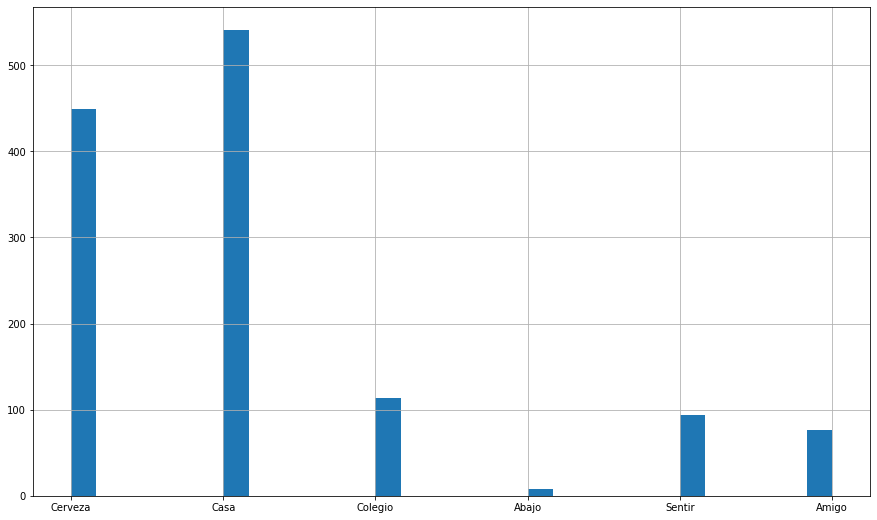

In [11]:
plt.figure(figsize=(15,9))
df['frame'].hist(bins=30)